In [1]:
from copy import deepcopy

from keras.applications.vgg16 import decode_predictions

import numpy as np
import cv2
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def create_occlusions_on_image(cv2_image, kernel_size):
    occl_images = []
    occl_iteration = (len(range(0, cv2_image.shape[1], kernel_size[1])), len(range(0, cv2_image.shape[0], kernel_size[0])))
    
    for y in range(0, cv2_image.shape[0], kernel_size[0]):
        for x in range(0, cv2_image.shape[1], kernel_size[1]):
            copy_image = deepcopy(cv2_image)

            # occlusion
            cv2.rectangle(copy_image, (x, y), (x+kernel_size[0], y+kernel_size[1]), thickness=-1, color=(0,0,0))
            occl_images.append(copy_image)

    return occl_images, occl_iteration

In [4]:
def get_prediction_prob_from_target_label(model, occluded_image, target_label):
    image = np.expand_dims(occluded_image, axis=0)
    preds = model.predict(image)
    labels = decode_predictions(preds)[0]

    for label in labels:
        if label[1]==target_label:
            print("Label: {} @ {}".format(label[1], label[-1]))
            return label[-1]
    
    print("Target label not found")
    return np.nan

In [5]:
def create_occlusion_prob_map(occlusion_probs, kernel_size):
    # reproject probabilities into image space
    occ_map = []
    for occ in occlusion_probs:
        occ_space = np.full(kernel_size, occ)
        occ_map.append(occ_space)
    return occ_map

In [15]:
def create_heatmap(occlusion_probs, kernel_size, occl_iteration, image_shape):
    occ_prob_array = np.array(occlusion_probs)
    occ_prob_normalised = (occ_prob_array - occ_prob_array.min()) / (occ_prob_array.max()-occ_prob_array.min())
    occ_prob_map = create_occlusion_prob_map(occ_prob_normalised, kernel_size)

    prob_rows = [np.hstack(occ_prob_map[indxnum: indxnum+occl_iteration[1]]) for indxnum in range(0, len(occ_prob_map), occl_iteration[1])]
    occ_prob_image = np.vstack(prob_rows)

    heatmap = np.uint8(255 * occ_prob_image)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    intensified_heatmap = (heatmap*0.8).astype(np.uint8)

    # reshape heatmap to fit image
    intensified_heatmap = intensified_heatmap[:image_shape[0], :image_shape[1], ]

    return intensified_heatmap

In [7]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [8]:
cv2_image = cv2.resize(cv2.imread('./pandas-for-data-analysis.jpg'), (224, 224))

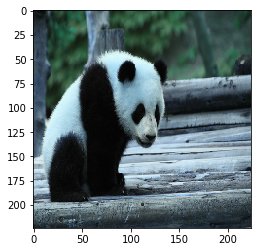

In [9]:
plt.imshow(cv2_image)

In [10]:
occlusion_kernel_size = (10, 10)
occluded_images, occl_iteration = create_occlusions_on_image(cv2_image, occlusion_kernel_size)
print("Number of images: {}".format(len(occluded_images)))

Number of images: 529


In [12]:
occlusion_kernel_size2 = (25, 25)
occluded_images2, occl_iteration2 = create_occlusions_on_image(cv2_image, occlusion_kernel_size2)
print("Number of images: {}".format(len(occluded_images2)))

Number of images: 81


## Create GIF for occlusion

In [11]:
pil_images = [Image.fromarray(occluded_image.astype('uint8'), 'RGB') for occluded_image in occluded_images]

pil_images[0].save('panda_occlusion10x10.gif',
           save_all=True,
           append_images=pil_images[1:],
           duration=150,
           loop=0)

In [24]:
target_label = 'giant_panda'

occlusion_probs = []

for occluded_image in occluded_images:
    pred_prob = get_prediction_prob_from_target_label(model, occluded_image, target_label)
    occlusion_probs.append(pred_prob)

Label: giant_panda @ 0.9971888661384583
Label: giant_panda @ 0.9972947239875793
Label: giant_panda @ 0.9975438714027405
Label: giant_panda @ 0.9975709319114685
Label: giant_panda @ 0.9969717264175415
Label: giant_panda @ 0.9973102807998657
Label: giant_panda @ 0.997480571269989
Label: giant_panda @ 0.997563362121582
Label: giant_panda @ 0.9979667663574219
Label: giant_panda @ 0.9980360865592957
Label: giant_panda @ 0.9978244304656982
Label: giant_panda @ 0.9975632429122925
Label: giant_panda @ 0.9972013235092163
Label: giant_panda @ 0.997162401676178
Label: giant_panda @ 0.9972647428512573
Label: giant_panda @ 0.9972430467605591
Label: giant_panda @ 0.997545063495636
Label: giant_panda @ 0.9978057742118835
Label: giant_panda @ 0.9981217980384827
Label: giant_panda @ 0.9978766441345215
Label: giant_panda @ 0.9976910352706909
Label: giant_panda @ 0.9974721074104309
Label: giant_panda @ 0.9973419308662415
Label: giant_panda @ 0.9974191188812256
Label: giant_panda @ 0.9972993731498718
Labe

Label: giant_panda @ 0.9973721504211426
Label: giant_panda @ 0.9979274272918701
Label: giant_panda @ 0.9966884255409241
Label: giant_panda @ 0.9982520937919617
Label: giant_panda @ 0.9991782307624817
Label: giant_panda @ 0.9973886609077454
Label: giant_panda @ 0.9963033199310303
Label: giant_panda @ 0.9961220622062683
Label: giant_panda @ 0.9965470433235168
Label: giant_panda @ 0.9948225021362305
Label: giant_panda @ 0.9953920841217041
Label: giant_panda @ 0.9949526786804199
Label: giant_panda @ 0.9941099286079407
Label: giant_panda @ 0.9972968697547913
Label: giant_panda @ 0.9950619339942932
Label: giant_panda @ 0.9972041845321655
Label: giant_panda @ 0.9971687197685242
Label: giant_panda @ 0.9970600008964539
Label: giant_panda @ 0.9973582625389099
Label: giant_panda @ 0.9971544742584229
Label: giant_panda @ 0.9970876574516296
Label: giant_panda @ 0.9973239898681641
Label: giant_panda @ 0.9976054430007935
Label: giant_panda @ 0.9972313046455383
Label: giant_panda @ 0.9976295232772827


Label: giant_panda @ 0.9980762004852295
Label: giant_panda @ 0.9973607659339905
Label: giant_panda @ 0.997212827205658
Label: giant_panda @ 0.9975021481513977
Label: giant_panda @ 0.9968265295028687
Label: giant_panda @ 0.9969252943992615
Label: giant_panda @ 0.9962413311004639
Label: giant_panda @ 0.9962692260742188
Label: giant_panda @ 0.9969011545181274
Label: giant_panda @ 0.9966835379600525
Label: giant_panda @ 0.9967592358589172
Label: giant_panda @ 0.9965928196907043
Label: giant_panda @ 0.997076153755188
Label: giant_panda @ 0.9981589913368225
Label: giant_panda @ 0.9983648657798767
Label: giant_panda @ 0.998581051826477
Label: giant_panda @ 0.9990960359573364
Label: giant_panda @ 0.999308705329895
Label: giant_panda @ 0.9992720484733582
Label: giant_panda @ 0.9989680051803589
Label: giant_panda @ 0.998511016368866
Label: giant_panda @ 0.9983475208282471
Label: giant_panda @ 0.9985034465789795
Label: giant_panda @ 0.9980472326278687
Label: giant_panda @ 0.997192919254303
Label:

In [27]:
prob_heatmap = create_heatmap(occlusion_probs, occlusion_kernel_size, occl_iteration, cv2_image.shape)

In [28]:
cv2_image.shape, prob_heatmap.shape

((224, 224, 3), (224, 224, 3))

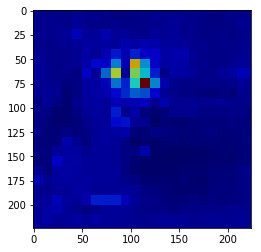

In [29]:
plt.imshow(prob_heatmap)

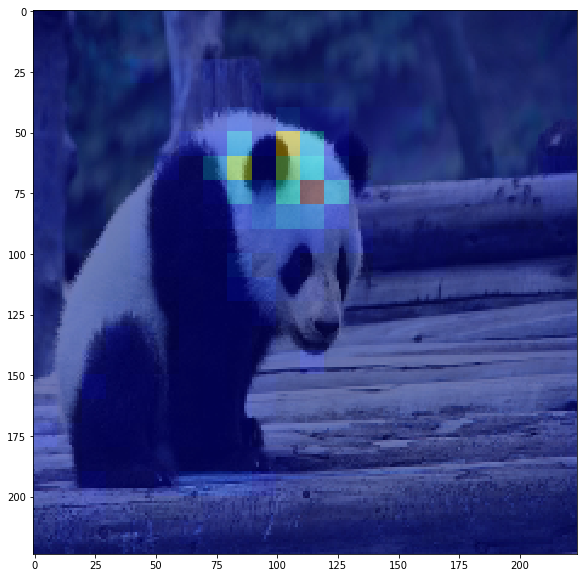

In [30]:
plt.figure(figsize=(10, 10))
cam_image = cv2.addWeighted(cv2_image, 0.5, prob_heatmap, 0.5, 0)
plt.imshow(cam_image)

In [31]:
cv2.imwrite("heatmap_10x10.jpg", cv2.cvtColor(prob_heatmap, cv2.COLOR_RGB2BGR))

True

In [32]:
cv2.imwrite("occlusion_heatmap_10x10.jpg", cv2.cvtColor(cam_image, cv2.COLOR_RGB2BGR))

True

In [37]:
prob_heatmap2.max()

204

In [38]:
prob_heatmap2

array([[[  0,   0, 144],
        [  0,   0, 144],
        [  0,   0, 144],
        ...,
        [  0,   0, 140],
        [  0,   0, 140],
        [  0,   0, 140]],

       [[  0,   0, 144],
        [  0,   0, 144],
        [  0,   0, 144],
        ...,
        [  0,   0, 140],
        [  0,   0, 140],
        [  0,   0, 140]],

       [[  0,   0, 144],
        [  0,   0, 144],
        [  0,   0, 144],
        ...,
        [  0,   0, 140],
        [  0,   0, 140],
        [  0,   0, 140]],

       ...,

       [[  0,   0, 150],
        [  0,   0, 150],
        [  0,   0, 150],
        ...,
        [  0,   0, 144],
        [  0,   0, 144],
        [  0,   0, 144]],

       [[  0,   0, 150],
        [  0,   0, 150],
        [  0,   0, 150],
        ...,
        [  0,   0, 144],
        [  0,   0, 144],
        [  0,   0, 144]],

       [[  0,   0, 150],
        [  0,   0, 150],
        [  0,   0, 150],
        ...,
        [  0,   0, 144],
        [  0,   0, 144],
        [  0,   0, 144]]